# Fusion - get started

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fusion import Fusion

plt.style.use("bmh")

## Establish the connection

In [2]:
fusion = Fusion()

## Show the available functionality

In [3]:
fusion

Fusion object 
Available methods:
+-------------------------+-----------------------------------------------------------------------------------------------+
| catalog_resources       | List the resources contained within the catalog, for example products and datasets.           |
| dataset_resources       | List the resources available for a dataset, currently this will always be a datasetseries.    |
| datasetmember_resources | List the available resources for a datasetseries member.                                      |
| download                | Downloads the requested distributions of a dataset to disk.                                   |
| from_bytes              | Uploads data from an object in memory.                                                        |
| get_events              | Run server sent event listener and print out the new events. Keyboard terminate to stop.      |
| get_fusion_filesystem   | Creates Fusion Filesystem.                                            

## Access function documentation

In [4]:
fusion.to_df?

Signature:
fusion.to_df(
    dataset: str,
    dt_str: str = 'latest',
    dataset_format: str = 'parquet',
    catalog: str = None,
    n_par: int = None,
    show_progress: bool = True,
    columns: List = None,
    filters: List = None,
    force_download: bool = False,
    download_folder: str = None,
    dataframe_type: str = 'pandas',
    **kwargs,
) -> pandas.core.frame.DataFrame
Docstring:
Gets distributions for a specified date or date range and returns the data as a dataframe.

Args:
    dataset (str): A dataset identifier
    dt_str (str, optional): Either a single date or a range identified by a start or end date,
        or both separated with a ":". Defaults to 'latest' which will return the most recent
        instance of the dataset.
    dataset_format (str, optional): The file format, e.g. CSV or Parquet. Defaults to 'parquet'.
    catalog (str, optional): A catalog identifier. Defaults to 'common'.
    n_par (int, optional): Specify how many distributions to download 

## Explore the datasets

In [5]:
fusion.list_datasets("FX")

,identifier,title,containerType,region,category,coverageStartDate,coverageEndDate,description,status
12,FX_EASIDX,Economic Activity Surprise Index (EASI) FX,Snapshot-Full,"EMEA, North America, Emerging Markets, APAC, G...",Economic,2019-01-01,2024-02-01,The Economic Activity Surprise Index is publis...,Subscribed
22,FX_MEAN_IMM,FX Mean Reversion Strategies IMM,Snapshot-Full,"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2024-02-01,"The FX Mean Reversion, IMM dataset from J.P. M...",Subscribed
28,FXO_RR,FX Option Structure | Risk Reversal,Snapshot-Full,"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2024-02-01,Implied volatility for 10 and 25 delta FX opti...,Subscribed
29,FXO_ST,FX Option Structure | Strangles,Snapshot-Full,"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2024-02-01,Implied volatility for 10 and 25 delta FX opti...,Subscribed
39,FXO_SP,FX Cash Rate,Snapshot-Full,"EMEA, North America, Emerging Markets, APAC, G...",FX,2019-01-01,2024-04-11,This dataset includes FX spot rates for major ...,Subscribed
53,STANDARD_VALUED_HOLDINGS_SUMMARY,Sample: Valued Holdings Summary,Snapshot-Full,Global,Middle Office,NaN,NaN,Provides portfolio level valuation in a specif...,Available
60,FX_ECONOMIC,FX Specialized | Momentum Strategies (Economics),Snapshot-Full,"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2024-01-29,Momentum signals in a trend following strategy...,Subscribed
89,FX_JPM_TCI,FX Passive Index,Snapshot-Full,"EMEA, North America, APAC, Global",FX,2019-01-01,2024-02-01,FX passive index level and currency sub-indices.,Subscribed
90,FX_MEAN_HFFV,FX Mean Reversion Strategies Hi Freq Fair Value,Snapshot-Full,"EMEA, North America, APAC, Global",FX,2019-01-01,2024-02-01,The FX High Frequency Fair Value dataset from ...,Subscribed
126,STANDARD_VALUED_HOLDINGS,Sample: Valued Holdings,Snapshot-Full,Global,Middle Office,NaN,NaN,Provides market value in local currency of the...,Available


## Display the attributes

In [6]:
fusion.list_dataset_attributes("FXO_SP")

,source,dataType,description,identifier,isDatasetKey,title
0,Data Query,String,The instrument name,instrument_name,True,Instrument Name
1,Data Query,String,The currency pair,currency_pair,False,Currency Pair
2,Data Query,String,"The time period of an investment, agreement or...",term,False,Term
3,Data Query,String,The product identifier,product,False,Product
4,Data Query,String,The snapshot date,date,False,Date
5,Data Query,Double,The spot and forward fx rate,fx_rate,False,FX Rate


## Download and load

In [7]:
df = fusion.to_df("FXO_SP", "20220101:20221231", columns=["currency_pair", "date", "fx_rate"], filters=[("currency_pair", "=", "GBPUSD")])

100%|████████████████████████████████████████████████████████████████████████████████| 258/258 [00:26<00:00,  9.77it/s]


## Analyze

In [8]:
df.head()

,currency_pair,date,fx_rate
0,GBPUSD,20221118,1.19300
1,GBPUSD,20220310,1.31295
2,GBPUSD,20220322,1.32590
3,GBPUSD,20220318,1.31705
4,GBPUSD,20220103,1.34475


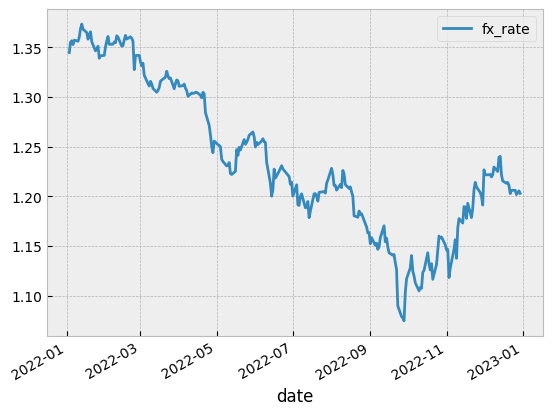

In [9]:
df["date"] = pd.to_datetime(df["date"].astype("str"))
df.sort_values("date").set_index("date").plot(grid=True);